This notebook presents a simulation of 5000 ms of 400 descending commands and 800 motoneurons from soleus. The force is prduced by a Hill-type muscle model. 

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib notebook 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"


import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from NeuralTract import NeuralTract
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory
from jointAnkleForceTask import jointAnkleForceTask
from numba import jit, prange

In [2]:
conf = Configuration('confImpedanceAnkle.rmto')
conf.simDuration_ms = 500 # Here I change simulation duration without changing the Configuration file.
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [3]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = MotorUnitPool(conf, 'MG')
pools[2] = MotorUnitPool(conf, 'LG')
pools[3] = MotorUnitPool(conf, 'TA')
pools[4] = NeuralTract(conf, 'CMExt')
pools[5] = AfferentPool(conf,'Ia', 'SOL')
pools[6] = AfferentPool(conf,'Ia', 'MG')
pools[7] = AfferentPool(conf,'Ia', 'LG')
pools[8] = AfferentPool(conf,'Ia', 'TA')
ankle = jointAnkleForceTask(conf, pools)
Syn = SynapsesFactory(conf, pools)
del Syn

3586.0
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
1306.0
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
606.0
Muscle spindle from muscle LG built.
Motor Unit Pool LG built
674.0
Muscle spindle from muscle TA built.
Motor Unit Pool TA built
Descending Command CMExt built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle MG built
Afferent Pool Ia of muscle LG built
Afferent Pool Ia of muscle TA built
All the 817337 synapses were built


def simulatePool(n, i):
    pools[n].atualizeMotorUnitPool(t[i])

import multiprocessing  
from functools import partial

pool = multiprocessing.Pool(processes=4)
tic = time.time()
for i in xrange(0,len(t)-1): 
    if i % 1000 == 0:
        print i
    ankle.atualizeAnkle(t[i], 0.05 * np.random.randn(1,1))
    #pools[4].atualizePool(t[i])
    pool.map(partial(simulatePool, i=i), range(4))
    #pools[5].atualizeAfferentPool(t[i], pools[0].spindle.IaFR_Hz)
    #pools[6].atualizeAfferentPool(t[i], pools[1].spindle.IaFR_Hz)
    #pools[7].atualizeAfferentPool(t[i], pools[2].spindle.IaFR_Hz)
    #pools[8].atualizeAfferentPool(t[i], pools[3].spindle.IaFR_Hz)
    ankle.computeTorque(t[i])
toc = time.time()
pool.close()
pool.join()   
    
print str(toc - tic) + ' seconds'

In [4]:
tic = time.time()
for i in xrange(0,len(t)-1): 
    if i % 1000 == 0:
        print i
    ankle.atualizeAnkle(t[i], 0.05 * np.random.randn(1,1))
    #pools[4].atualizePool(t[i])
    for j in xrange(4):
        pools[j].atualizeMotorUnitPool(t[i])
    #pools[5].atualizeAfferentPool(t[i], pools[0].spindle.IaFR_Hz)
    #pools[6].atualizeAfferentPool(t[i], pools[1].spindle.IaFR_Hz)
    #pools[7].atualizeAfferentPool(t[i], pools[2].spindle.IaFR_Hz)
    #pools[8].atualizeAfferentPool(t[i], pools[3].spindle.IaFR_Hz)
    ankle.computeTorque(t[i])
toc = time.time()
 
    
print str(toc - tic) + ' seconds'

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


NameError: name 'pool' is not defined

In [5]:
print str(toc - tic) + ' seconds'
pools[0].listSpikes()
pools[1].listSpikes()
pools[2].listSpikes()
pools[3].listSpikes()
pools[4].listSpikes()
pools[5].listSpikes()
pools[6].listSpikes()
pools[7].listSpikes()
pools[8].listSpikes()

1359.7451489 seconds


In [ ]:
i

The spike times of the MNs along the 5000 ms of simulation are shown in Fig. \ref{fig:spikesMNHill}.

In [ ]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
    pools[5].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')
plt.show()

In [ ]:
plt.figure()
plt.plot(pools[2].poolTerminalSpikes[:, 0],
    pools[2].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Afferent index')

The muscle force produced by the Hill-type model is shown in Fig.\ref{fig:forceHill}.

In [ ]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')

The muscle length computed with the Hill-type model is shown in Fig.\ref{fig:lengthHill}.

In [ ]:
plt.figure()
plt.plot(t, pools[0].Muscle.length_m/pools[0].Muscle.optimalLength_m, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Length (m)')

The muscle velocity, computed by the Hill-type muscle model, is in Fig.\ref{fig:velocityHill}.

In [ ]:
plt.figure()
plt.plot(t, pools[0].Muscle.velocity_m_ms/pools[0].Muscle.optimalLength_m, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Velocity (m/ms)')

The ankle joint angle is shown in Fig. \ref{fig:ankleAngleHill}.

<IPython.core.display.Javascript object>


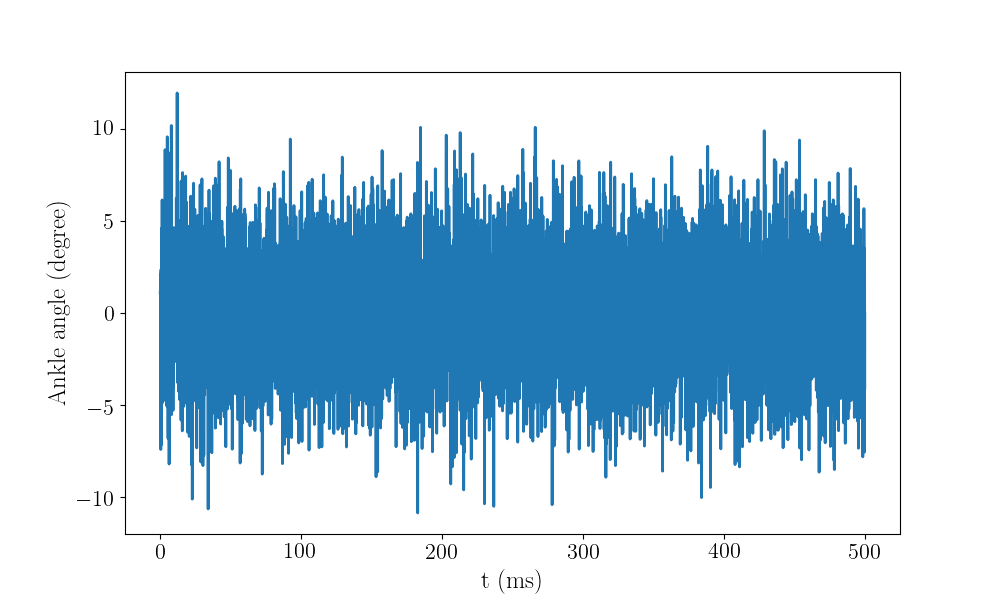

Text(0,0.5,u'Ankle angle (degree)')

In [6]:
plt.figure()
plt.plot(t, ankle.ankleAngle_rad*180.0/np.pi, '-')
plt.xlabel('t (ms)')
plt.ylabel('Ankle angle (degree)')

In [ ]:
plt.figure()
plt.xlabel('t (ms)')
plt.ylabel('Ankle angle (degree)')

<IPython.core.display.Javascript object>


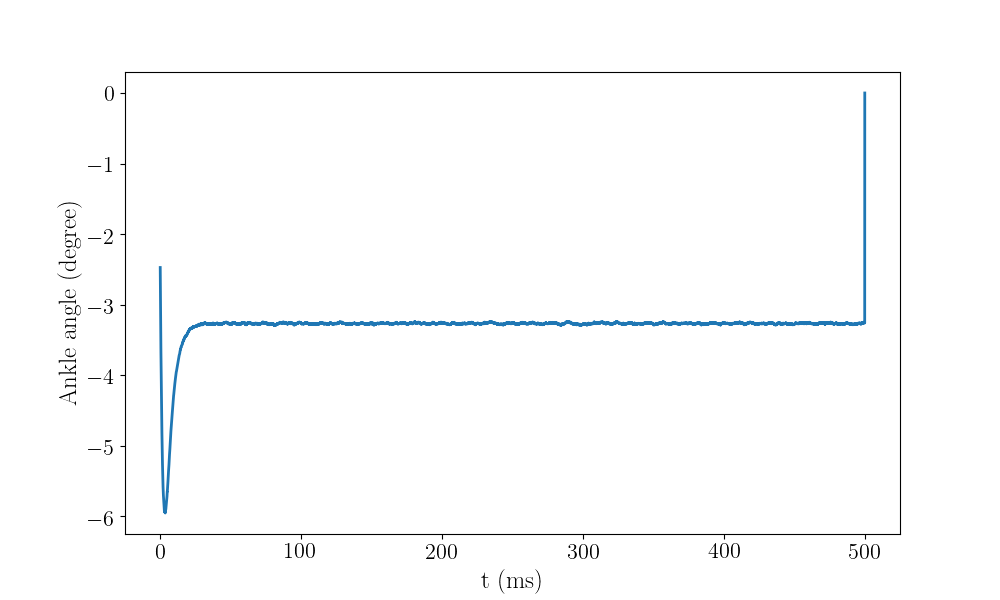

Text(0,0.5,u'Ankle angle (degree)')

In [7]:
%matplotlib notebook
plt.figure()
plt.plot(t, ankle.ankleTorque_Nm, '-')
plt.xlabel('t (ms)')
plt.ylabel('Ankle angle (degree)')

In [ ]:
torque  = ankle.ankleTorque_Nm
angle = ankle.ankleAngle_rad

In [ ]:
import scipy as sc
from scipy.signal import *
torque

In [ ]:
f,T = sc.signal.welch(np.transpose(sc.signal.detrend(torque[40000:130000])), fs = 20000, nperseg=20000)

In [ ]:
T

In [ ]:
plt.figure()
plt.plot(f,np.transpose(T))
plt.show()

In [ ]:
f, Sta = sc.signal.csd(np.transpose((torque)), np.transpose((angle)),fs = 20000, nperseg=40000)

In [ ]:
plt.figure()
plt.plot(np.log10(f),20*np.log10(np.transpose(np.abs(Sta))))
plt.xlim((-1,1.5))
plt.show()